In [2]:
import data as d
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
import torch


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\merit\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\merit\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1053, in launch_instance
    app.start()
  File "C:\Users\merit\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_lo

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\migue\\OneDrive\\Escritorio\\UAB INTELIGENCIA ARTIFICIAL\\Tercer Any\\3A\\Vision and Learning\\Challenge 3\\Image_Captioning\\archive\\Food Ingredients and Recipe Dataset with Image Name Mapping.csv'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


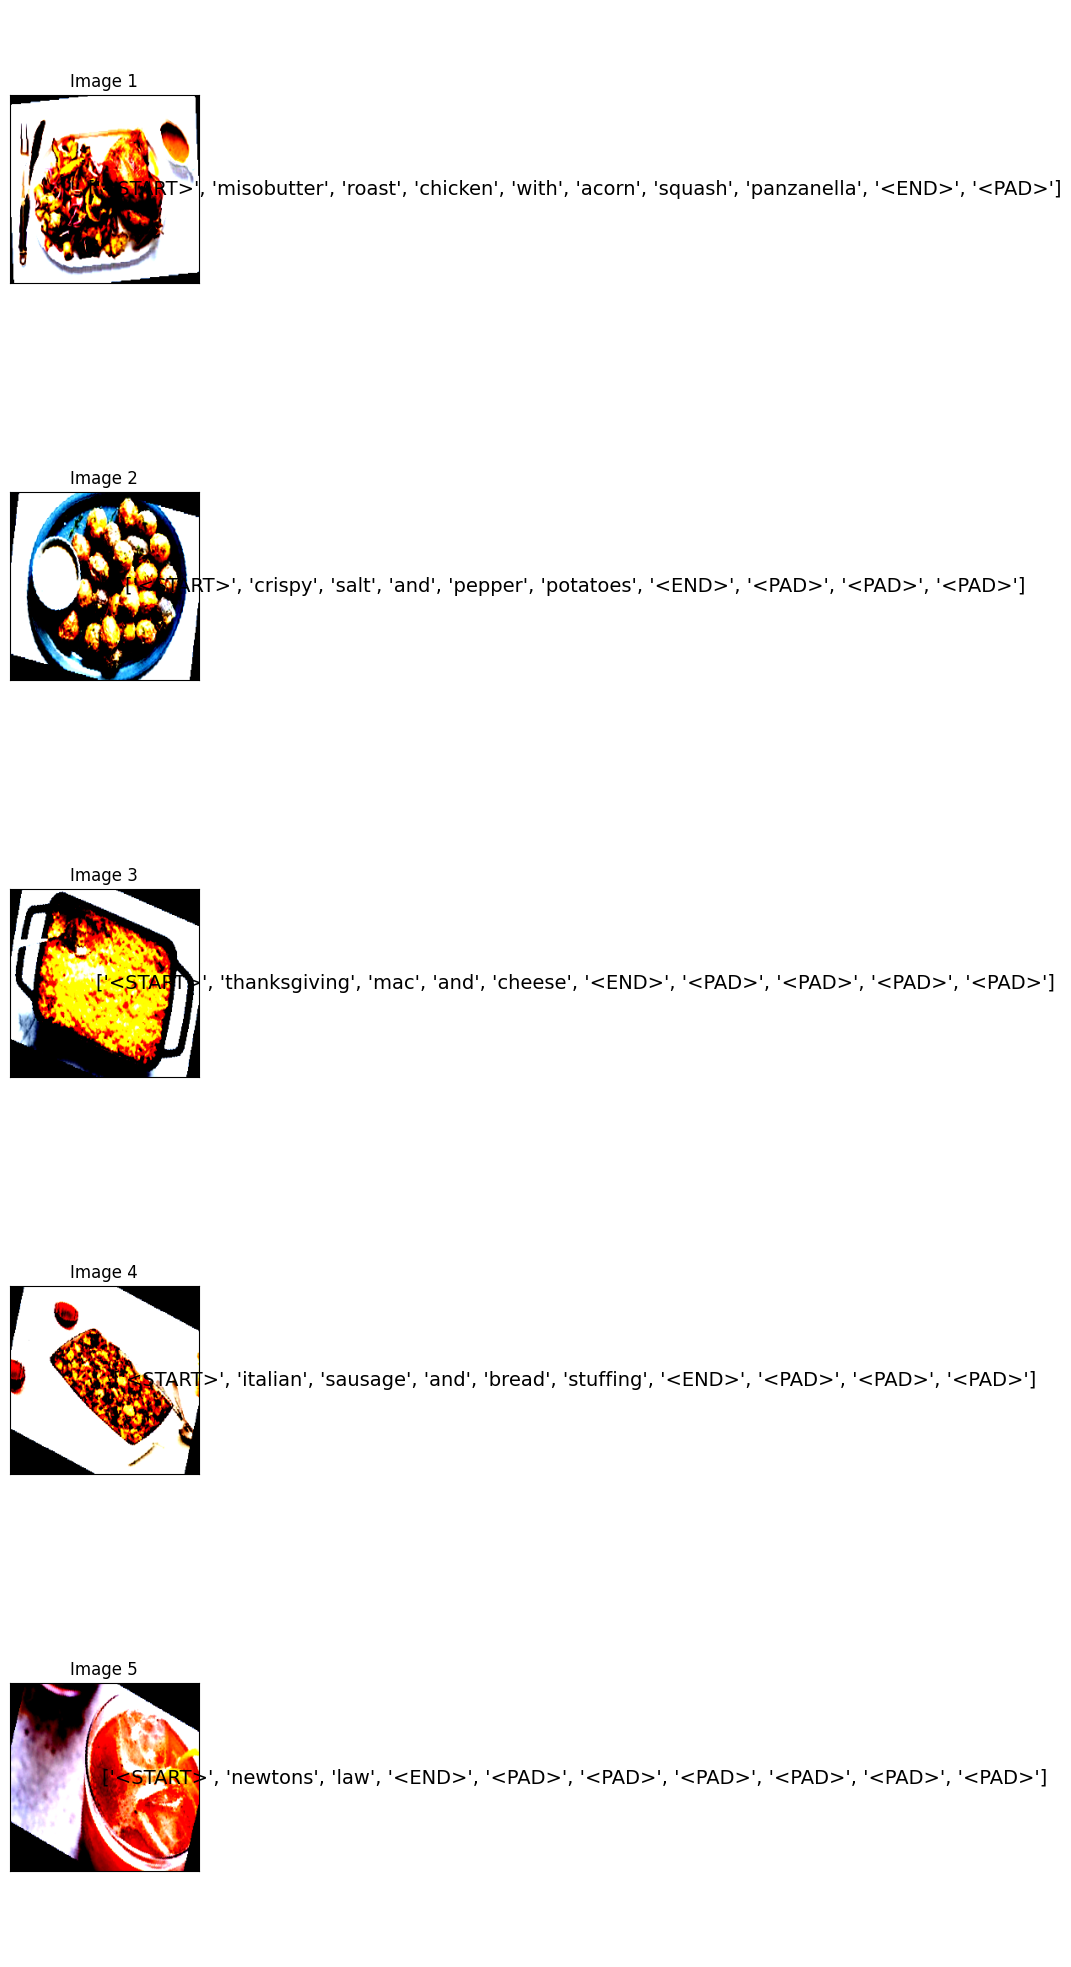

In [3]:
def visualization(dataset, num_of_images):
    count = 1
    fig = plt.figure(figsize=(10, 20))
    
    # Loop through a subset of images
    for idx in range(num_of_images):
        # Get image and caption from the dataset
        image, caption = dataset[idx]

        # Convert the image tensor to a format suitable for visualization
        if isinstance(image, torch.Tensor):
            image = image.permute(1, 2, 0)  # Convert (C, H, W) to (H, W, C)
            image = image.numpy()

        # Create the subplot for the image
        ax = fig.add_subplot(num_of_images, 2, count, xticks=[], yticks=[])
        ax.imshow(image)
        ax.set_title(f"Image {idx+1}", fontsize=12)
        count += 1
        
        # Create subplot for captions
        ax = fig.add_subplot(num_of_images, 2, count)
        plt.axis('off')  # Hide axes
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

        caption = d.dataset.vocab.decode(caption.numpy())  # Decodificar el tensor

        # Display the caption as a string
        ax.text(0.5, 0.5, caption, ha='center', fontsize=14, verticalalignment='center')
        count += 1
    
    plt.tight_layout()  # Ensure no overlap and proper spacing between subplots
    plt.show()

# Ejecución de ejemplo
visualization(d.dataset, 5)


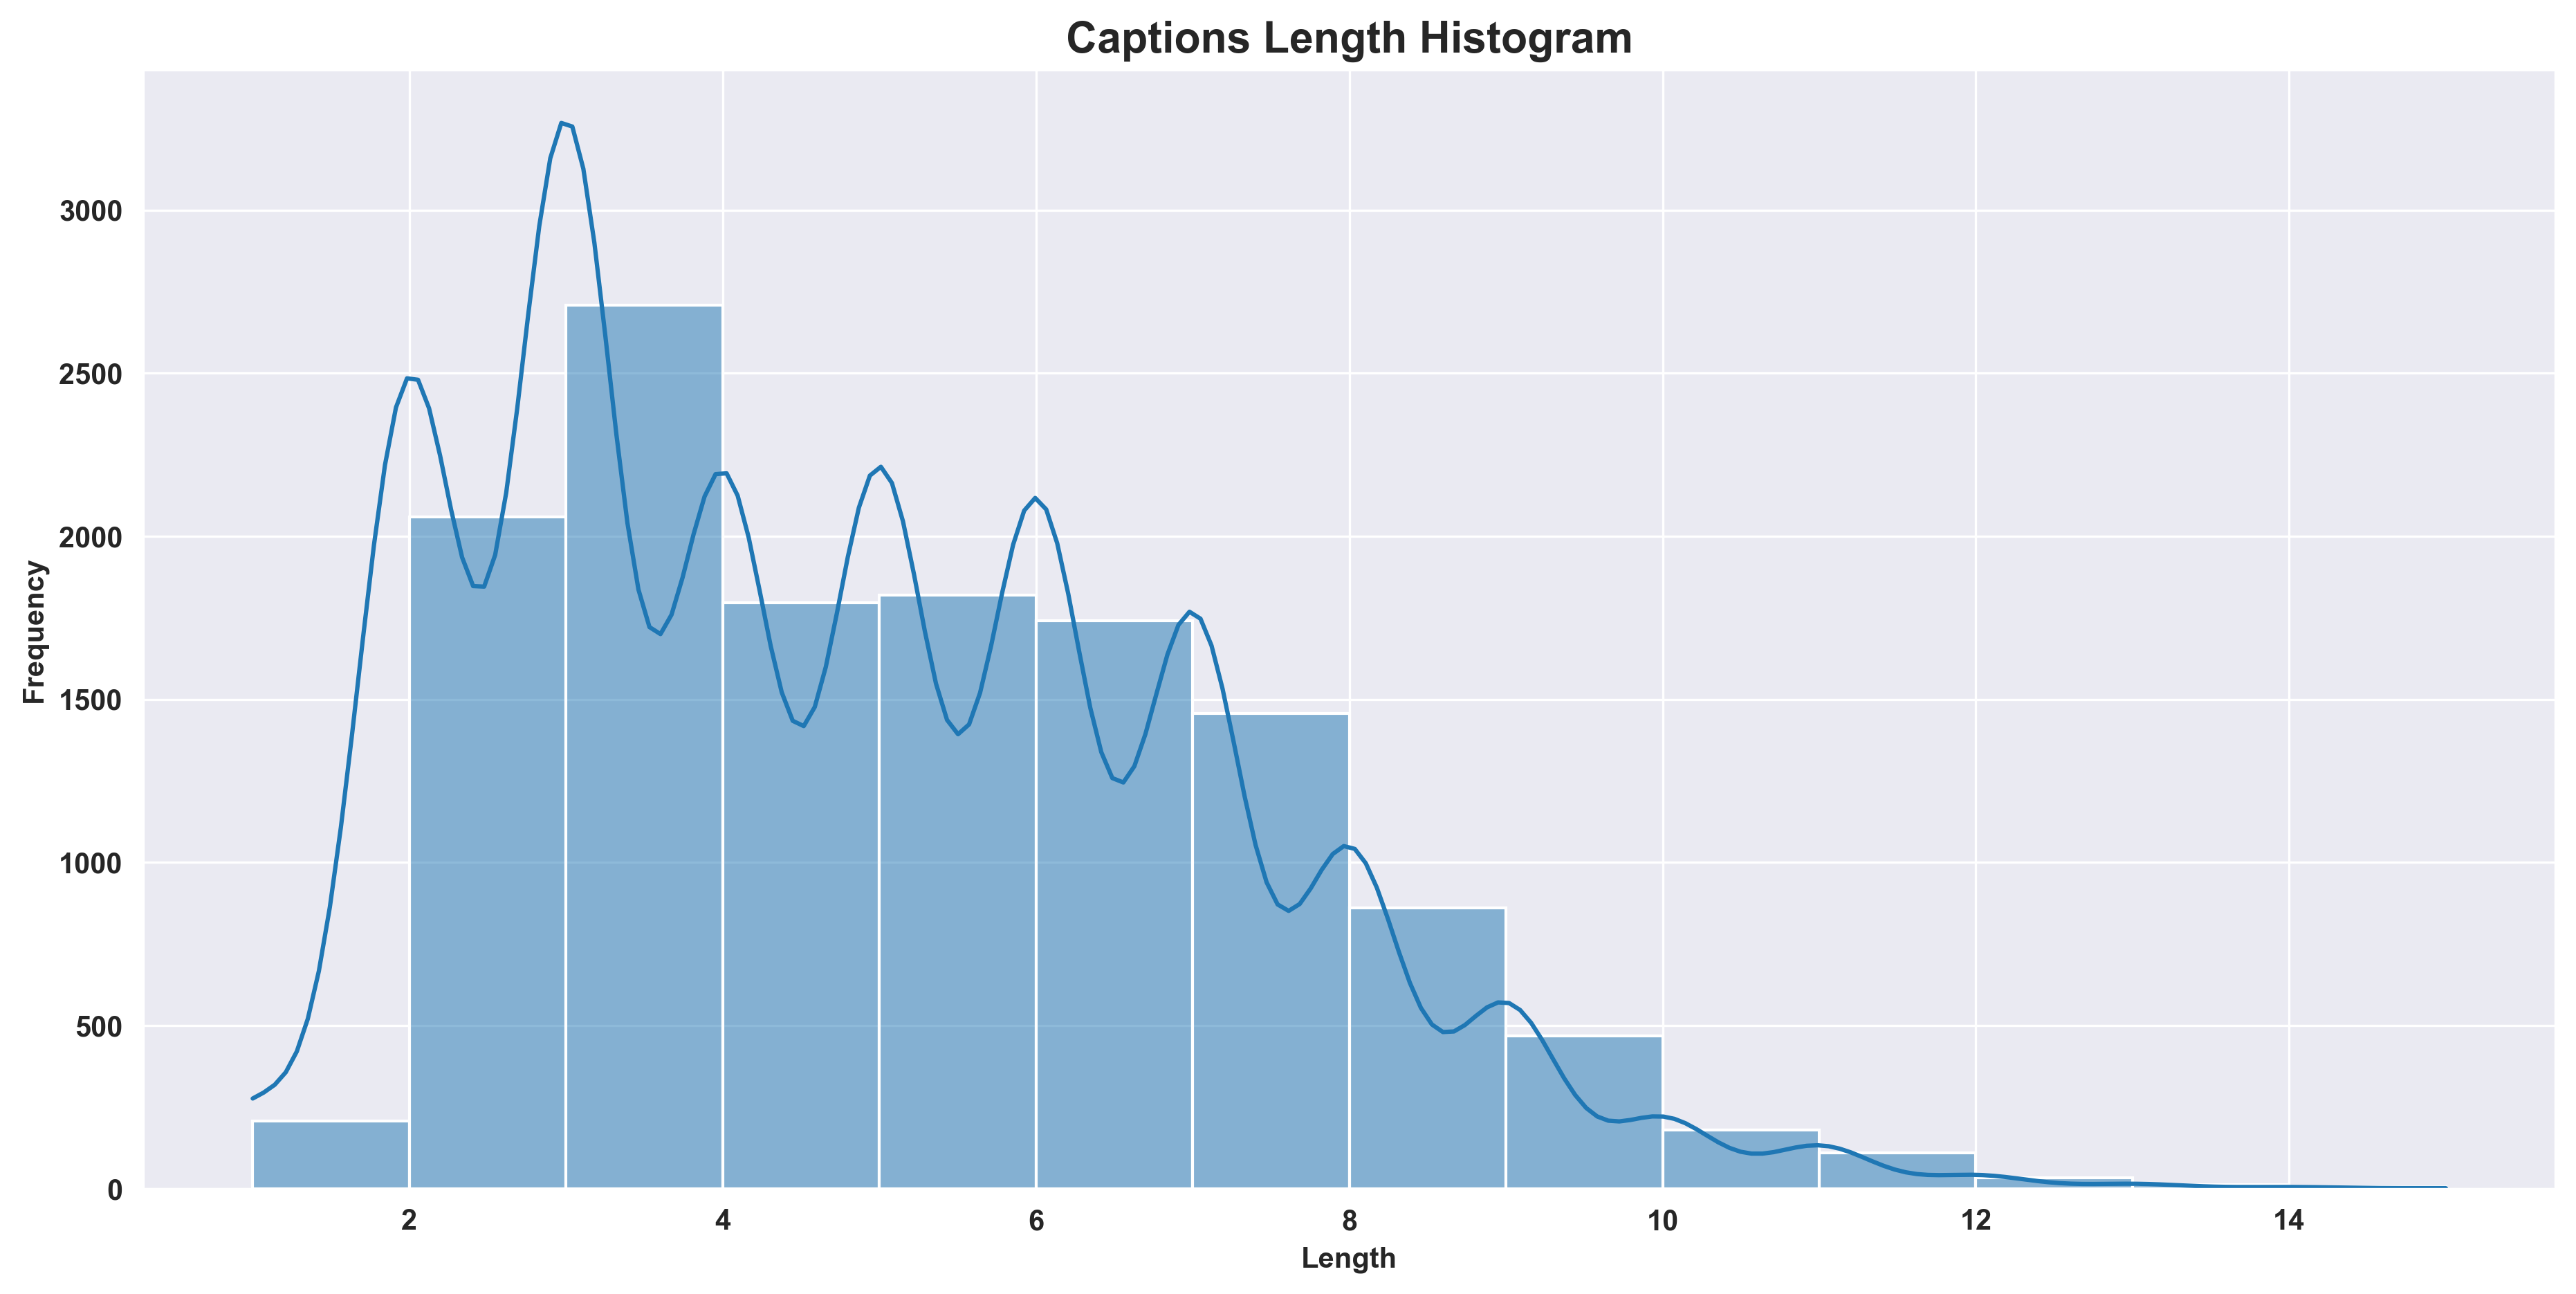

In [4]:
import seaborn as sns

def captions_length(data):
    # Verificar que la entrada sea una lista de textos
    if not isinstance(data, list):
        print("Error: Se esperaba una lista de cadenas de texto.")
        return
    
    plt.figure(figsize=(15, 7), dpi=300)
    sns.set_style('darkgrid')
    
    # Longitudes de captions
    lengths = [len(x.split()) for x in data if isinstance(x, str)]
    
    sns.histplot(x=lengths, kde=True, binwidth=1) 
    plt.title('Captions Length Histogram', fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.xlabel('Length', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.show()

# Ejemplo de uso
text_data = d.dataset.data['Title'].tolist()
captions_length(text_data)


In [5]:
from collections import Counter
import numpy as np
import plotly.graph_objects as go

def word_occurrences(data):
    # Validación de entrada
    if not isinstance(data, list) or not all(isinstance(x, str) for x in data):
        print("Error: Se esperaba una lista de cadenas de texto.")
        return

    # Combinar todas las frases en una sola cadena
    all_text = ' '.join(data).lower()
    #all_text = all_text.replace('a ', '')
    all_text = all_text.replace('<start> ', '')
    all_text = all_text.replace('<end> ', '')

    # Contar ocurrencias de palabras
    word_counts = Counter(all_text.split())

    # Extraer palabras y ocurrencias principales
    words = list(word_counts.keys())[:10]
    values = list(word_counts.values())[:10]

    # Normalizar valores para colores
    normalized_values = np.array(values) / np.max(values)
    colors = ['rgba(30, 58, 138, {:.2f})'.format(0.4 + 0.5 * val) for val in normalized_values]

    # Crear gráfico de pastel
    fig = go.Figure(data=[go.Pie(
        labels=words, 
        values=values, 
        hole=.6, 
        marker=dict(colors=colors), 
        textinfo='label+percent'
    )])

    # Configurar diseño del gráfico
    fig.update_layout(
        title_text="Word Occurrences in Captions", 
        title_font=dict(size=23, family='Balto')
    )

    fig.show()

# Ejemplo de uso
text_data = d.dataset.data['Title'].tolist()
word_occurrences(text_data)


In [6]:
for images, captions in d.train_loader:
    print(f"Shape of images batch: {images.shape}")  # Debe ser [batch_size, C, H, W]
    print(f"Shape of captions batch: {captions.shape}")  # Debe ser [batch_size, max_seq_length]
    print(f"Sample captions: {captions[0]}")  # Revisa las primeras secuencias
    break


Shape of images batch: torch.Size([8, 3, 224, 224])
Shape of captions batch: torch.Size([8, 10])
Sample captions: tensor([   2,   97, 2271,    6,   52,    3,    0,    0,    0,    0])


In [9]:
print(d.dataset.vocab.word2idx)
print(d.dataset.vocab.idx2word)

{'<PAD>': 0, '<UNK>': 1, '<START>': 2, '<END>': 3, 'misobutter': 4, 'roast': 5, 'chicken': 6, 'with': 7, 'acorn': 8, 'squash': 9, 'panzanella': 10, 'crispy': 11, 'salt': 12, 'and': 13, 'pepper': 14, 'potatoes': 15, 'thanksgiving': 16, 'mac': 17, 'cheese': 18, 'italian': 19, 'sausage': 20, 'bread': 21, 'stuffing': 22, 'newtons': 23, 'law': 24, 'warm': 25, 'comfort': 26, 'apples': 27, 'oranges': 28, 'turmeric': 29, 'hot': 30, 'toddy': 31, 'instant': 32, 'pot': 33, 'lamb': 34, 'haleem': 35, 'spiced': 36, 'lentil': 37, 'caramelized': 38, 'onion': 39, 'baked': 40, 'eggs': 41, 'pimento': 42, 'dip': 43, 'spiral': 44, 'ham': 45, 'in': 46, 'the': 47, 'slow': 48, 'cooker': 49, 'butternut': 50, 'apple': 51, 'soup': 52, 'caesar': 53, 'salad': 54, 'rice': 55, 'leeks': 56, 'salsa': 57, 'verde': 58, 'gorditas': 59, 'con': 60, 'camarones': 61, 'enfrijoladas': 62, 'plantain': 63, 'parfait': 64, 'potato': 65, 'gratin': 66, 'brown': 67, 'butter': 68, 'cream': 69, 'roasted': 70, 'beets': 71, 'sunchokes': 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

def captions_length_by_chars(data):
    # Verificar que la entrada sea una lista de textos
    if not isinstance(data, list):
        print("Error: Se esperaba una lista de cadenas de texto.")
        return
    
    plt.figure(figsize=(15, 7), dpi=300)
    sns.set_style('darkgrid')
    
    # Longitudes de captions en términos de caracteres
    lengths = [len(custom_standardization(x)) for x in data if isinstance(x, str)]
    
    sns.histplot(x=lengths, kde=True, binwidth=1) 
    plt.title('Captions Length (Characters) Histogram', fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.xlabel('Length (Characters)', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.show()

# Ejemplo de uso
text_data = d.dataset.data['Title'].tolist()
captions_length_by_chars(text_data)


KeyboardInterrupt: 